In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
df=yf.download('^IXIC', start='2010-01-01', end='2023-05-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000
2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000
...,...,...,...,...,...,...
2023-04-24,12053.469727,12103.580078,11960.299805,12037.200195,12037.200195,4854050000
2023-04-25,11968.809570,11990.459961,11798.769531,11799.160156,11799.160156,4806020000
2023-04-26,11913.230469,11967.990234,11833.070312,11854.349609,11854.349609,5281970000


In [3]:
df1=yf.download('^NSEI', start='2010-01-01', end='2023-05-01')
df1

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0
...,...,...,...,...,...,...
2023-04-24,17707.550781,17754.500000,17612.500000,17743.400391,17743.400391,255700
2023-04-25,17761.550781,17807.449219,17716.849609,17769.250000,17769.250000,297400
2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609,17813.599609,233000


# CORRELATION COEFFICIENT USING INBUILT FUNCTION .CORR()

In [4]:
correlation = df['Close'].corr(df1['Close'])
correlation

0.9513138758576779

Value of correlation coefficient as 1 means that it is a perfectly positive correlation. 
Since we have a correlation coefficient o .95 which is very close to 1, it suggests a high positive correlation, meaning that the two market indexes tend to move in the same direction most of the time That is if one of the indices goes up, we have a fair chance to say that other index will also go up. The 2 market indices are strongly correlated.

#  Lead Lag Relationship

This has been calculated by an inbuilt function which involves the technique Granger Casuality. 

The function is ts.grangercasuality() where ts is an alias for statsmodels.tsa.stattools which was found on internet.

In [5]:
import statsmodels.tsa.stattools as ts

combined_df = pd.concat([df['Close'], df1['Close']], axis=1)
combined_df.dropna(inplace=True)

granger_test_result = ts.grangercausalitytests(combined_df, maxlag=20)

for key, value in granger_test_result.items():
    print(f"Lag: {key}")
    print(f"Test Statistics: {value[0]}")
    print(f"p-value: {value[1]}")


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7184  , p=0.3967  , df_denom=3178, df_num=1
ssr based chi2 test:   chi2=0.7191  , p=0.3965  , df=1
likelihood ratio test: chi2=0.7190  , p=0.3965  , df=1
parameter F test:         F=0.7184  , p=0.3967  , df_denom=3178, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.1360  , p=0.0022  , df_denom=3175, df_num=2
ssr based chi2 test:   chi2=12.2913 , p=0.0021  , df=2
likelihood ratio test: chi2=12.2676 , p=0.0022  , df=2
parameter F test:         F=6.1360  , p=0.0022  , df_denom=3175, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.7190  , p=0.0007  , df_denom=3172, df_num=3
ssr based chi2 test:   chi2=17.1948 , p=0.0006  , df=3
likelihood ratio test: chi2=17.1485 , p=0.0007  , df=3
parameter F test:         F=5.7190  , p=0.0007  , df_denom=3172, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.4843  , p=0.

Now in the above output, we have the data for the past 20 periods. We consider that a p value is significant if it is less the .01. If this is the case, then there is a significant Granger causal effect from the second time series to the first one(here NIFTY 50 TO NASDAQ COMPOSITE). Now we can see that this starts to happen after 1 lag period. The lag value is the number of periods back we look when trying to predict the current value of the first time series using the past values of the second one. If the p-values are consistently significant at a specific lag or range of lags, it suggests a consistent leading/lagging relationship.

We say that if the p-values are consistently significant when the NSEI is the second time series, then the NSEI can be seen as "lagging" the IXIC. This basically means that IXIC cause NSEI or basically NSEI is lagging.

Hence we conclude thet NSEI is lagging IXIC.

In [6]:
granger_test_result = ts.grangercausalitytests(combined_df, maxlag=20)

for key, value in granger_test_result.items():
    p_value = value[0]['ssr_ftest'][1] # get p-value of F-test
    print(f"Lag: {key}")
    print(f"Test Statistics: {value[0]}")
    if p_value < 0.05:
        print(f"At lag {key}, IXIC Granger-causes NSEI")
    else:
        print(f"At lag {key}, IXIC does NOT Granger-cause NSEI")
    print("\n") 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7184  , p=0.3967  , df_denom=3178, df_num=1
ssr based chi2 test:   chi2=0.7191  , p=0.3965  , df=1
likelihood ratio test: chi2=0.7190  , p=0.3965  , df=1
parameter F test:         F=0.7184  , p=0.3967  , df_denom=3178, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.1360  , p=0.0022  , df_denom=3175, df_num=2
ssr based chi2 test:   chi2=12.2913 , p=0.0021  , df=2
likelihood ratio test: chi2=12.2676 , p=0.0022  , df=2
parameter F test:         F=6.1360  , p=0.0022  , df_denom=3175, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.7190  , p=0.0007  , df_denom=3172, df_num=3
ssr based chi2 test:   chi2=17.1948 , p=0.0006  , df=3
likelihood ratio test: chi2=17.1485 , p=0.0007  , df=3
parameter F test:         F=5.7190  , p=0.0007  , df_denom=3172, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.4843  , p=0.

In the above cell more accessible and readable output is given.

# Alternatively

We can make this strategy where we find the correlation factors between the 2 indices in which we compare the data of one indice which is running 20 days back(lag period in this case) then the other indice.

Then we can reverse the indices and find the case in which we get a better correlation factor which tells us that, that particular case is more strongly related.

In [7]:
df['lag']=df['Close'].shift(-20)
df

,Open,High,Low,Close,Adj Close,Volume,lag
Date,,,,,,,
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000,2190.060059
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000,2190.909912
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000,2125.429932
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000,2141.120117
2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000,2126.050049
...,...,...,...,...,...,...,...
2023-04-24,12053.469727,12103.580078,11960.299805,12037.200195,12037.200195,4854050000,NaN
2023-04-25,11968.809570,11990.459961,11798.769531,11799.160156,11799.160156,4806020000,NaN
2023-04-26,11913.230469,11967.990234,11833.070312,11854.349609,11854.349609,5281970000,NaN


In [8]:
df1['lag']=df1['Close'].shift(-20)
df1

,Open,High,Low,Close,Adj Close,Volume,lag
Date,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0,4830.100098
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0,4931.850098
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0,4845.350098
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0,4718.649902
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0,4760.399902
...,...,...,...,...,...,...,...
2023-04-24,17707.550781,17754.500000,17612.500000,17743.400391,17743.400391,255700,NaN
2023-04-25,17761.550781,17807.449219,17716.849609,17769.250000,17769.250000,297400,NaN
2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609,17813.599609,233000,NaN


In [9]:
corr_ixic_lag = df['lag'].corr(df1['Close'])
corr_ixic_lag

0.9416196517520307

In [10]:
corr_nsei_lag = df['Close'].corr(df1['lag'])
corr_nsei_lag

0.9526137062315061

!!!!!!! In the function .corr(), the missing values(here caused by shifting the values in the column) are automatically excluded and hence we need not worry about them. !!!!!!!  (We shifted the columns to consider the lag period which here is taken as 20 days.)

Here, we can see that when we talked about the correlation factor when IXIC was lagging, it is comparitively less then what we observe the correlation factor for NSEI lagging. The correlation coefficient for IXIC and NSEI lagging is even better then the correlation factor between the 2 indices. This suggests that NSEI lagging is more strongly related to IXIC, hence we can conclude that NSEI is consistently lagging IXIC.

In [11]:
corr_nifty_lag = []

for i in range(20):
    corr_nifty_lag.append(df['Close'].corr(df1['Close'].shift(-i)))
    
print(corr_nifty_lag)
print(max(corr_nifty_lag))

[0.9513138758576779, 0.9516886972274932, 0.9517605357331197, 0.9519019053466036, 0.9520289778063074, 0.9521960967692539, 0.9522392257994337, 0.9523085966183568, 0.952363200476015, 0.9524228247352742, 0.952448492158063, 0.9524215913905245, 0.9524080763923509, 0.9524689626318059, 0.9524309169027849, 0.9523976290055693, 0.9524684551023465, 0.9524723034607625, 0.9525116884117789, 0.952552063221987]
0.952552063221987


On parameter optimisation, we see that the maximum correlation factor has been found when the lag period was 19.

# Conclusion

We conclude that we will choose IXIC as the index for parameter optimisation.

Investing in the lagging index based on insights from the leading index can be a valid strategy, known as a "follow-the-leader" approach. This approach assumes that the leading index serves as a precursor or indicator for the movements of the lagging index. By analyzing the leading index, you aim to gain insights into potential future movements of the lagging index and adjust your investment strategy accordingly

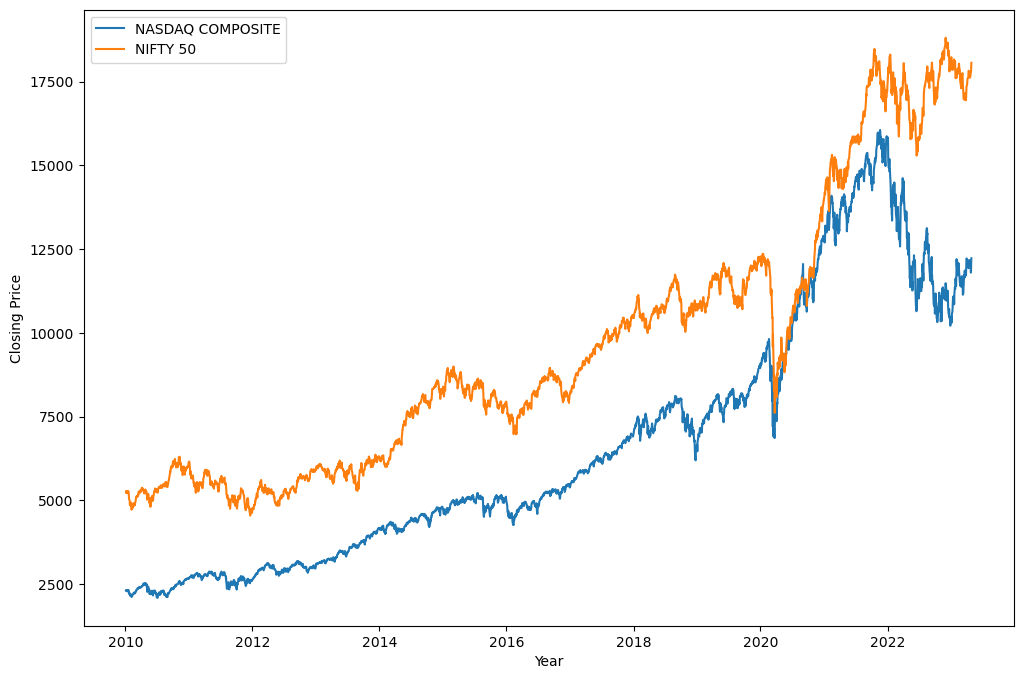

In [12]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df.index, df['Close'], label='NASDAQ COMPOSITE')
ax.plot(df1.index, df1['Close'], label='NIFTY 50')

ax.set_xlabel('Year')
ax.set_ylabel('Closing Price')

ax.legend()

plt.show()

# Keltner Channel

In [13]:
ema_period=20
atr_period=14

# EMA #

df['EMA'] = df['Close'].ewm(span=ema_period).mean()

# ATR #

df['H-L'] = df['High'] - df['Low']
df['H-PC'] = abs(df['High'] - df['Close'].shift(1))
df['L-PC'] = abs(df['Low'] - df['Close'].shift(1))
df['TR'] = df[['H-L', 'H-PC', 'L-PC']].max(axis=1)

df['ATR'] = df['TR'].rolling(window=atr_period).apply(lambda x: (np.sum(x) - x[-1]) / (atr_period - 1) + x[-1] / atr_period)


df

,Open,High,Low,Close,Adj Close,Volume,lag,EMA,H-L,H-PC,L-PC,TR,ATR
Date,,,,,,,,,,,,,
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000,2190.060059,2308.419922,16.739990,NaN,NaN,16.739990,NaN
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000,2190.909912,2308.572192,18.109863,5.310059,12.799805,18.109863,NaN
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000,2125.429932,2305.824808,18.390137,5.360107,13.030029,18.390137,NaN
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000,2141.120117,2304.157725,16.080078,0.209961,15.870117,16.080078,NaN
2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000,2126.050049,2307.305264,26.989990,17.550049,9.439941,26.989990,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24,12053.469727,12103.580078,11960.299805,12037.200195,12037.200195,4854050000,NaN,12014.002361,143.280273,31.120117,112.160156,143.280273,167.493395
2023-04-25,11968.809570,11990.459961,11798.769531,11799.160156,11799.160156,4806020000,NaN,11993.541199,191.690430,46.740234,238.430664,238.430664,174.321402
2023-04-26,11913.230469,11967.990234,11833.070312,11854.349609,11854.349609,5281970000,NaN,11980.284857,134.919922,168.830078,33.910156,168.830078,172.730716


We have calculated the EMA by a built in function ewm(span). The function calculates the Exponential Weighted Moving Average over the span that has been provided. Then we take the mean for that particular span which essentially give the EMA.



Then we have calculated the ATR. We have created different columns for different substituents and then we have defined TR i.e. True Range by taking the max of the substituents.

Then for calculating the ATR, we have applied the rolling function on True Range in the time period of 14 days. For this we have simply applied the formula for ATR.

In [14]:
missing_values = df.isnull().sum()
missing_values

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
lag          20
EMA           0
H-L           0
H-PC          1
L-PC          1
TR            0
ATR          13
dtype: int64

So we have 13 missing values in ATR column(which is obvious as we defined the atr period to be 14).

To fix this, we will use a simple strategy. We will calculate the mean of the first 20 datapoints(ATR) and then fill the missing values with those.

In [15]:
start_row = 14  
end_row = 34

mean = np.mean(df['ATR'][start_row:end_row])
mean

40.32416663536658

In [16]:
df['ATR'] = df['ATR'].fillna(40.32416663536658)
df

,Open,High,Low,Close,Adj Close,Volume,lag,EMA,H-L,H-PC,L-PC,TR,ATR
Date,,,,,,,,,,,,,
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000,2190.060059,2308.419922,16.739990,NaN,NaN,16.739990,40.324167
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000,2190.909912,2308.572192,18.109863,5.310059,12.799805,18.109863,40.324167
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000,2125.429932,2305.824808,18.390137,5.360107,13.030029,18.390137,40.324167
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000,2141.120117,2304.157725,16.080078,0.209961,15.870117,16.080078,40.324167
2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000,2126.050049,2307.305264,26.989990,17.550049,9.439941,26.989990,40.324167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24,12053.469727,12103.580078,11960.299805,12037.200195,12037.200195,4854050000,NaN,12014.002361,143.280273,31.120117,112.160156,143.280273,167.493395
2023-04-25,11968.809570,11990.459961,11798.769531,11799.160156,11799.160156,4806020000,NaN,11993.541199,191.690430,46.740234,238.430664,238.430664,174.321402
2023-04-26,11913.230469,11967.990234,11833.070312,11854.349609,11854.349609,5281970000,NaN,11980.284857,134.919922,168.830078,33.910156,168.830078,172.730716


In [17]:
df['Upper_Keltner'] = df['EMA'] + (2* df['ATR'])
df['Lower_Keltner'] = df['EMA'] - (2* df['ATR'])

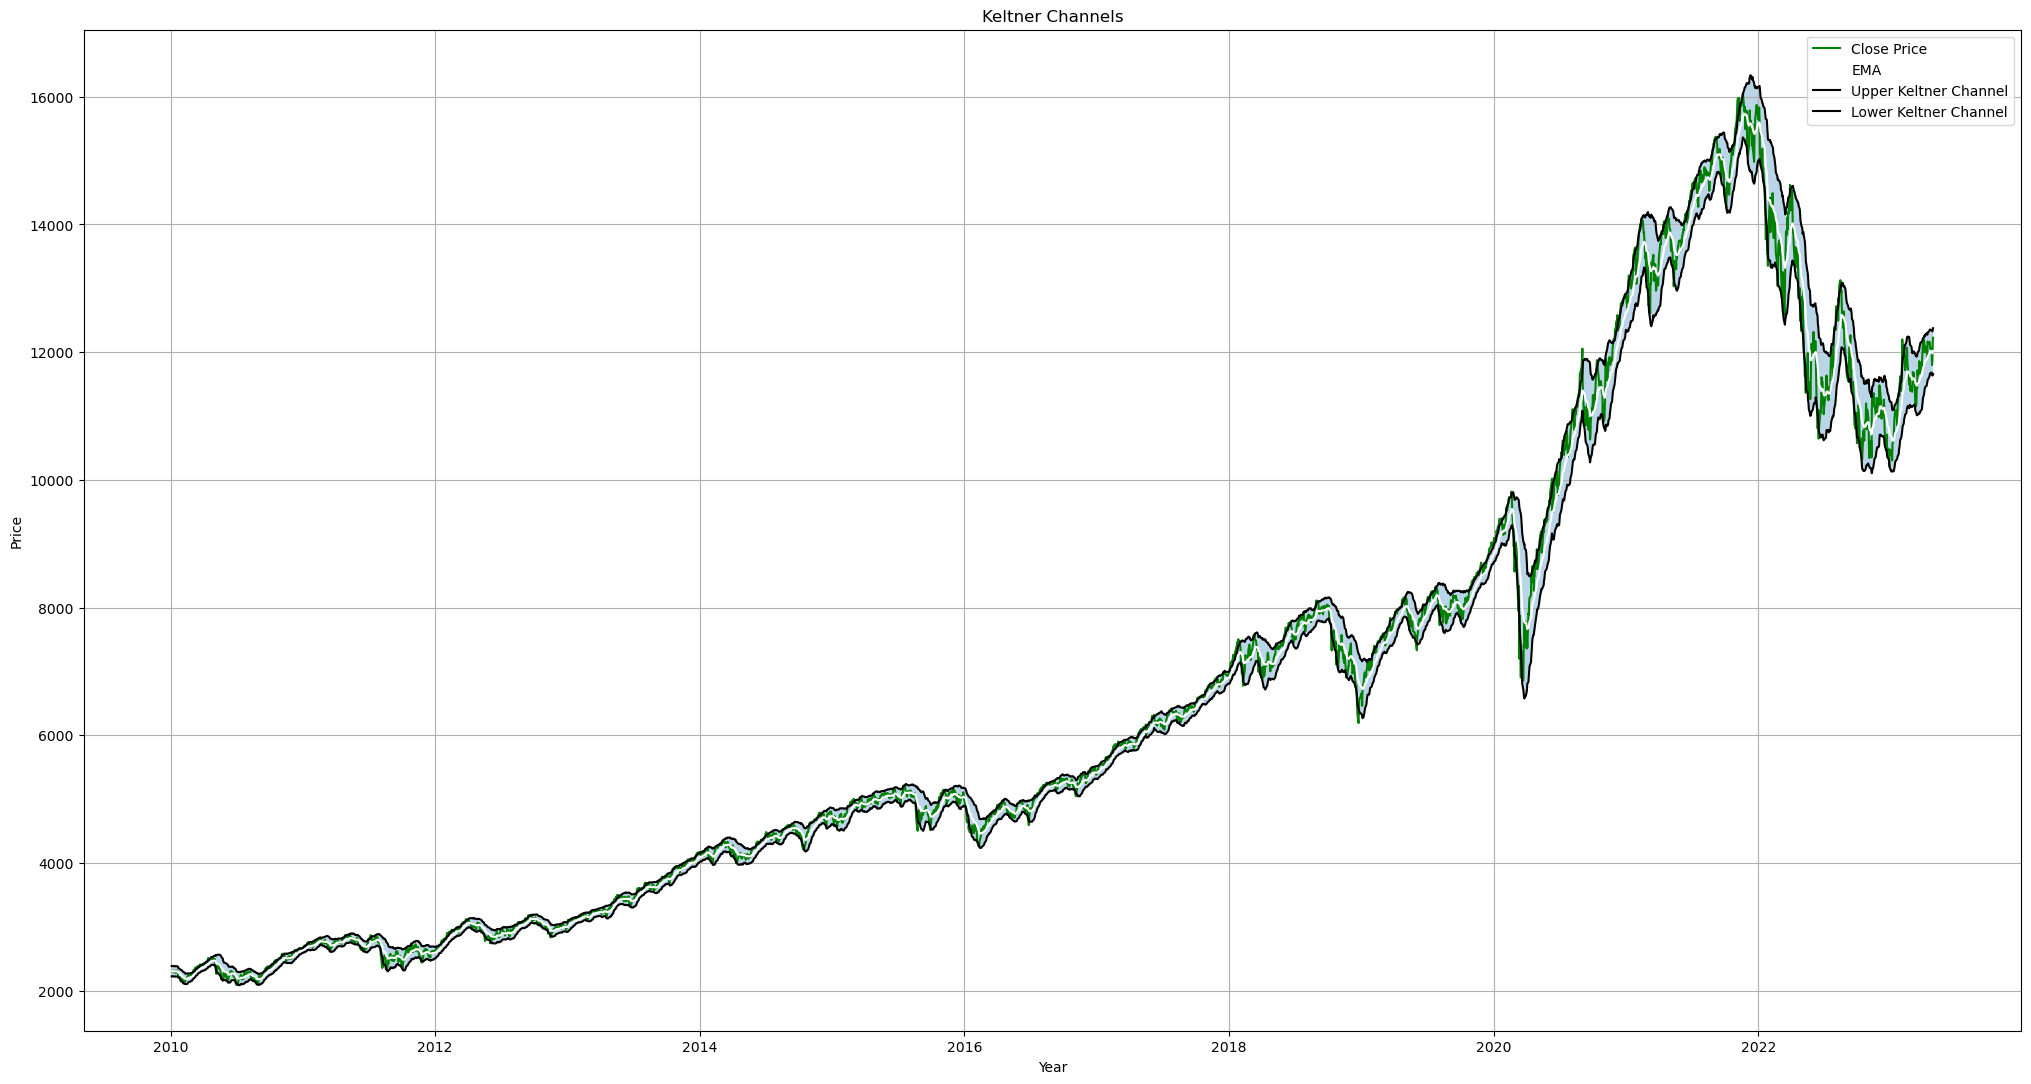

In [18]:
plt.figure(figsize=(25,13))
plt.plot(df['Close'], label='Close Price',c='green')
plt.plot(df['EMA'], label='EMA',c='w')
plt.plot(df['Upper_Keltner'], label='Upper Keltner Channel',c='black')
plt.plot(df['Lower_Keltner'], label='Lower Keltner Channel',c='black')
plt.title('Keltner Channels')
plt.xlabel('Year')
plt.ylabel('Price')

plt.fill_between(df.index, df['Upper_Keltner'],df['Lower_Keltner'],  alpha=0.3)
plt.legend(loc='best')
plt.grid(True)

plt.show()

# Bollinger Bands

In [19]:
window = 20
no_of_std = 2

df['SMA'] = df['Close'].rolling(window).mean()
df['Deviation']  = df['Close'].rolling(window).std()

df['Bollinger High'] = df['SMA'] + (df['Deviation'] * no_of_std)
df['Bollinger Low'] = df['SMA'] - (df['Deviation'] * no_of_std)

df2=pd.DataFrame(df['SMA'])
df2['Deviation']=df['Deviation']
df2['Bollinger High']=df['Bollinger High']
df2['Bollinger Low']=df['Bollinger Low']
df2=df2.dropna()
df2['Close']=df['Close']
df2

,SMA,Deviation,Bollinger High,Bollinger Low,Close
Date,,,,,
2010-02-01,2262.945984,57.358133,2377.662250,2148.229718,2171.199951
2010-02-02,2257.027991,58.513687,2374.055364,2140.000617,2190.060059
2010-02-03,2251.137988,58.964713,2369.067415,2133.208562,2190.909912
2010-02-04,2242.354980,64.000160,2370.355301,2114.354660,2125.429932
2010-02-05,2234.408484,66.285360,2366.979204,2101.837764,2141.120117
...,...,...,...,...,...
2023-04-24,12051.002002,132.945264,12316.892530,11785.111473,12037.200195
2023-04-25,12052.518018,129.691392,12311.900802,11793.135233,11799.160156
2023-04-26,12059.431494,113.485820,12286.403134,11832.459854,11854.349609


We have taken a period of 20 days for calculating volatility based on Bollinger Bands. Then we have found the Simple Moving Average and the Deviation in the price which is moving with the help of Rolling Function. 

Finally we have found the values of the Higher Bollinger Band and the Lower Bollinger Band.

Below is the give plot of the Bollinger Bands and the Closing Price of the index(IXIC).

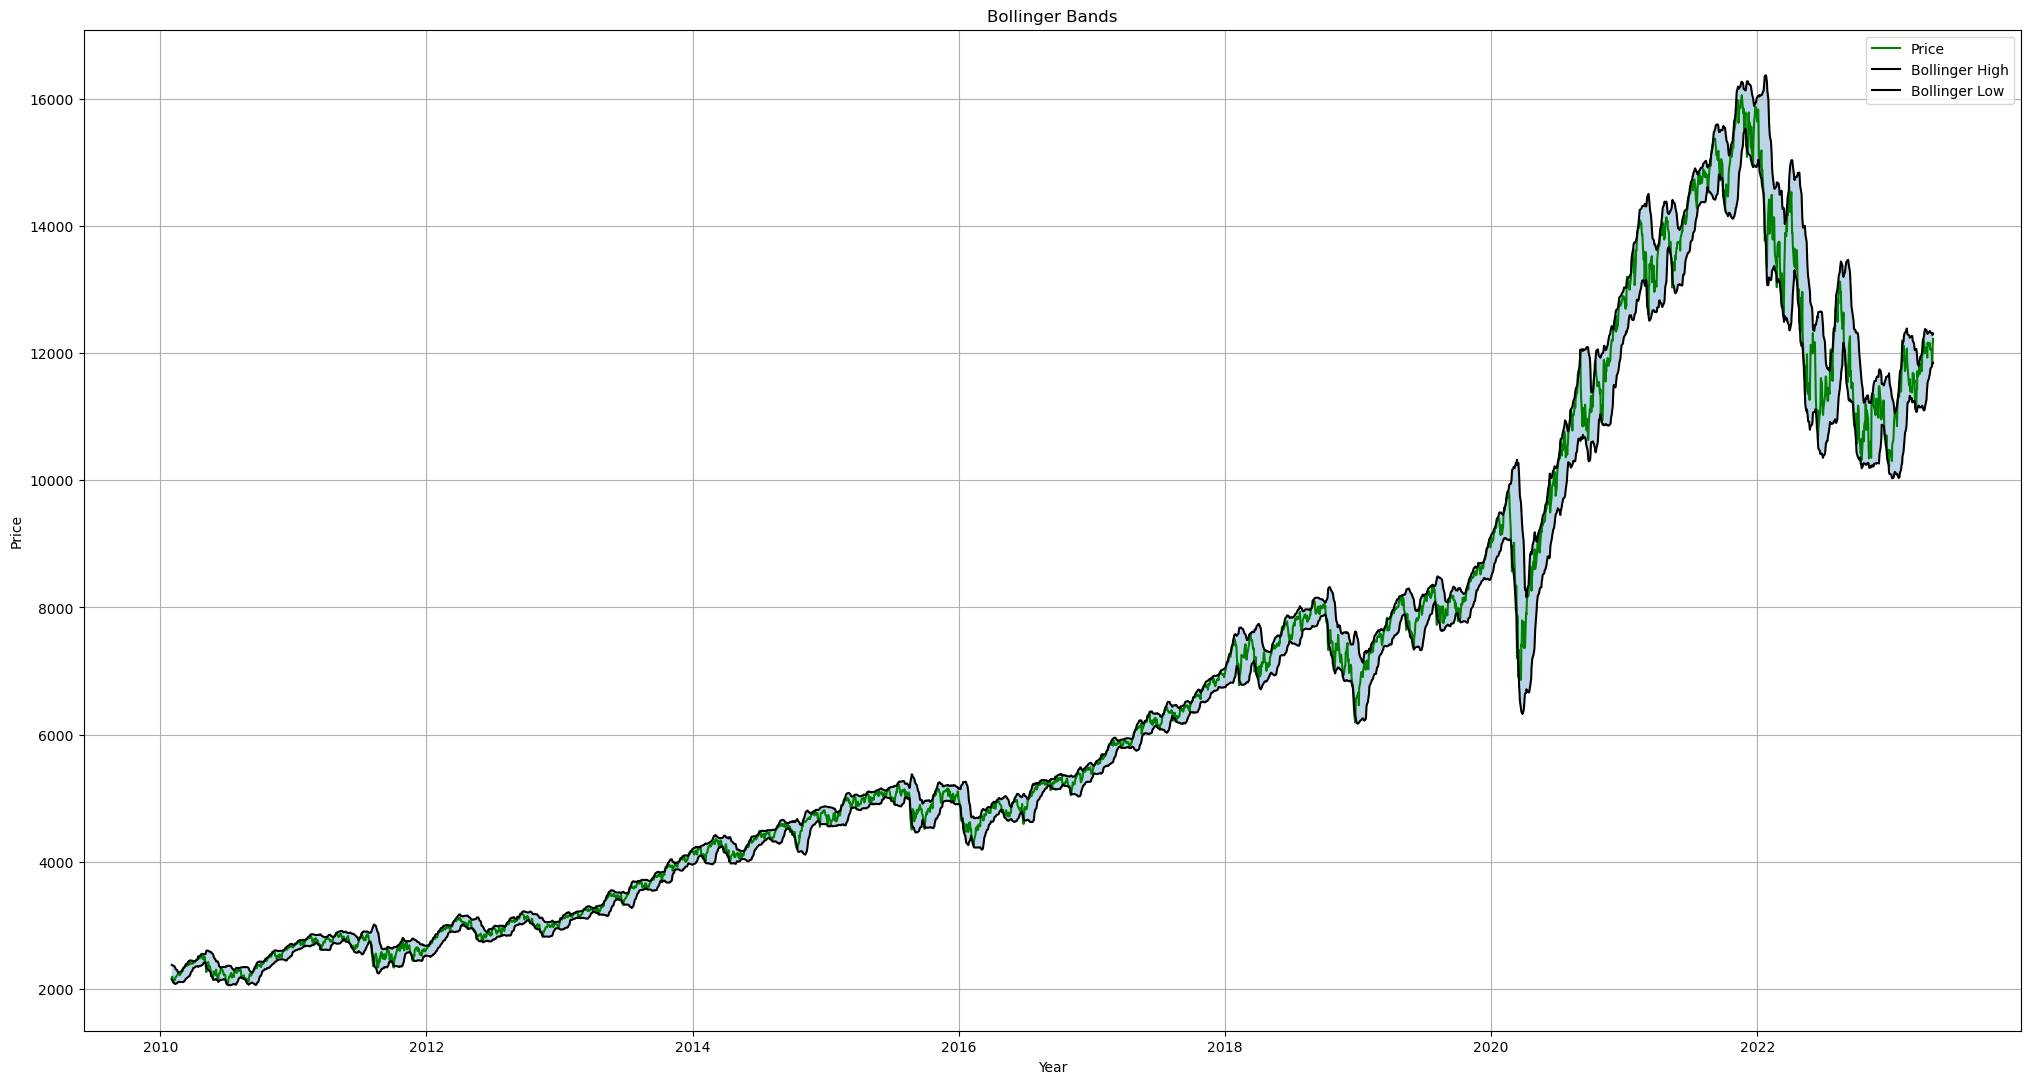

In [20]:
fig, ax = plt.subplots(figsize=(25,13))

ax.plot(df2.index, df2['Close'], color='green', label='Price')
ax.plot(df2.index, df2['Bollinger High'], color='black', label='Bollinger High')
ax.plot(df2.index, df2['Bollinger Low'], color='black', label='Bollinger Low')

ax.set_title('Bollinger Bands')
ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.legend()

plt.fill_between(df2.index, df2['Bollinger High'],df2['Bollinger Low'],  alpha=0.3)
plt.grid(True)

plt.show()

# MACD Indicators

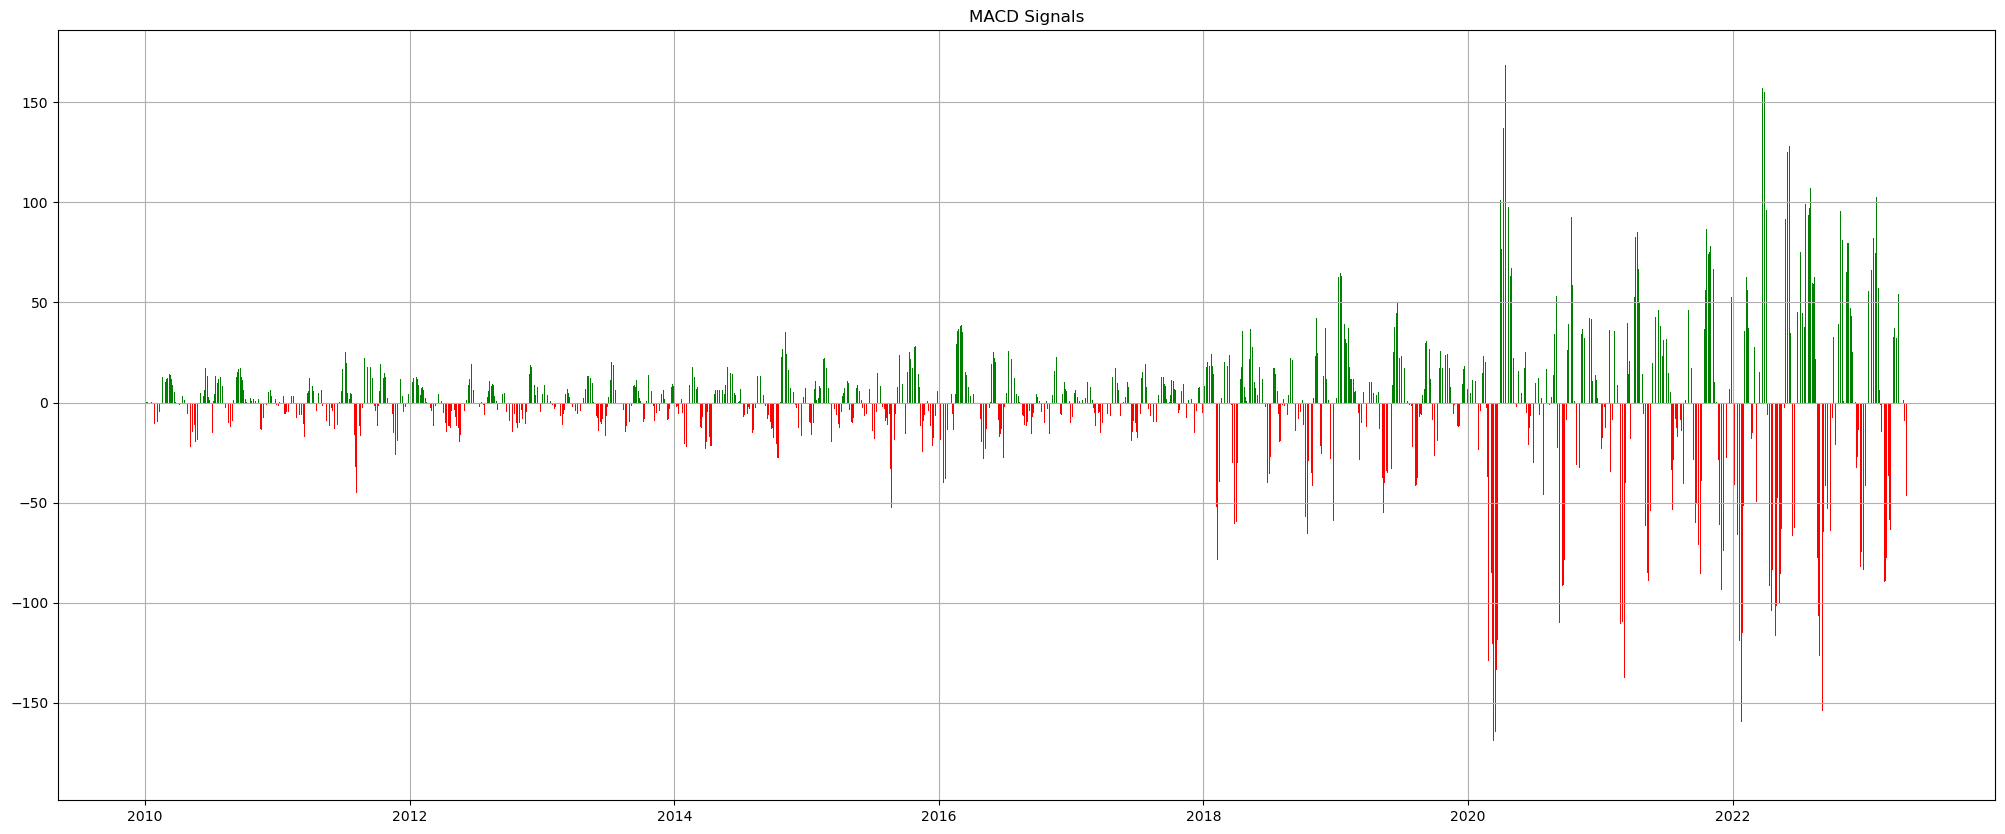

In [21]:
ema12 = df['Close'].ewm(span=12, adjust=False).mean()
ema26 = df['Close'].ewm(span=26, adjust=False).mean()
macd_line = ema12 - ema26

signal_line = macd_line.ewm(span=9, adjust=False).mean()

histogram = macd_line - signal_line

plt.figure(figsize=(25,10))

plt.bar(df.index, histogram, label='MACD - Signal',color=np.where(histogram < 0, 'red', 'green'))
plt.title("MACD Signals")
plt.grid(True)

plt.show()

Here we have used the simple formula for MACD indicators and plotted them as histograms which are the distance between the MACD Line and the Signal Line which is essentially the difference we need. For MACD line we have taken the difference between the 12 day EMA and the 26 day EMA. Later we have calculate the Signal Line by taking the EMA for past 12 days.

This indicator will basically help us to determine when there is an overbought or an oversold condition in the market and can help us to take positions in such manner.

# PARAMETER OPTIMISATION

Lets optimise the parameters for MACD indicator.

In [22]:
indices = ['^DJI', '^GSPC', '^RUT', '^NYA', '^IXIC']

data_dict = {index: yf.download(index, start='2010-01-01', end='2023-05-01') for index in indices}

# we have created a dictionary with key as the ticker symbol and the value as a dataframe

data_dict

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'^DJI':                     Open          High           Low         Close  \
 Date                                                                 
 2010-01-04  10430.690430  10604.969727  10430.690430  10583.959961   
 2010-01-05  10584.559570  10584.559570  10522.519531  10572.019531   
 2010-01-06  10564.719727  10594.990234  10546.549805  10573.679688   
 2010-01-07  10571.110352  10612.370117  10505.209961  10606.860352   
 2010-01-08  10606.400391  10619.400391  10554.330078  10618.190430   
 ...                  ...           ...           ...           ...   
 2023-04-24  33805.039062  33891.148438  33726.089844  33875.398438   
 2023-04-25  33828.339844  33875.488281  33525.390625  33530.828125   
 2023-04-26  33596.339844  33645.828125  33235.851562  33301.871094   
 2023-04-27  33381.660156  33859.750000  33374.648438  33826.160156   
 2023-04-28  33797.429688  34104.558594  33728.398438  34098.160156   
 
                Adj Close     Volume  
 Date                       

In [23]:
# creating a function which will take in closing prices and the calculate MACD data


def calculate_macd(data, short_period, long_period):
    short_ema = data.ewm(span=short_period, adjust=False).mean()
    long_ema = data.ewm(span=long_period, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=12, adjust=False).mean()
    return macd_line, signal_line

# creating a function for backtesting the data of MACD
# here we have made a simple strategy to go long when the MACD line is above signal line and to go short when it is below the signal line
# we have stored the positions in another column "Positions" which contains 1(long) and -1(short)
# we calculate the return of the strategy by multiplying the positions by the daily percentage change in the index's close price

def backtest_macd(data, short_period, long_period):
    macd_line, signal_line = calculate_macd(data['Close'], short_period, long_period)
    data['macd'] = macd_line
    data['signal'] = signal_line
    data['positions'] = np.where(data['macd'] > data['signal'], 1, -1)
    data['returns'] = data['positions'].shift() * data['Close'].pct_change()
    return data['returns'].sum()

# we have made a grid search for the best parameters
# we have considered the range for the short period between 5 and 50
# we have considered the range for the long period between 20 and 50

for index in indices:
    data = data_dict[index]
    best_profit = -np.inf
    best_params = None
    for short_period in range(5, 25):
        for long_period in range(20, 50):
            if long_period > short_period:
                profit = backtest_macd(data.copy(), short_period, long_period)
                if profit > best_profit:
                    best_profit = profit
                    best_params = (short_period, long_period)
    print('Best parameters for', index, 'are:', best_params)

Best parameters for ^DJI are: (11, 49)
Best parameters for ^GSPC are: (19, 33)
Best parameters for ^RUT are: (13, 25)
Best parameters for ^NYA are: (6, 20)
Best parameters for ^IXIC are: (5, 42)


With such varied outputs, we will take the average of them.

(10.8,33.8) is the averaged out spans foe short period and long period. Lets round them off to (11,34).

Now let us optimise the parameters for Bollinger Bands.

In [24]:
# creating a function for bollinger bands

def calculate_bollinger_bands(data, n):
    sma = data.rolling(window=n).mean()
    std = data.rolling(window=n).std()
    upper_band = sma + (2 * std)
    lower_band = sma - (2 * std)
    return upper_band, lower_band

# creating a function for backtesting bollinger bands indicator
# we have a simple strategy for going long when the price crosses the lower bollinger band and to short when the price crosses the upper bollinger band.
# we also do nothing when the price remains between the bands

def backtest_bollinger(data, n):
    upper_band, lower_band = calculate_bollinger_bands(data['Close'], n)
    data['upper_band'] = upper_band
    data['lower_band'] = lower_band
    data['positions'] = np.where(data['Close'] < data['lower_band'], 1, np.where(data['Close'] > data['upper_band'], -1, 0))
    data['returns'] = data['positions'].shift() * data['Close'].pct_change()
    return data['returns'].sum()

# we have made a grid search for the range of the span(SMA,Deviation) between 5 and 50

for index in indices:
    data = data_dict[index]
    best_profit = -np.inf
    best_n = None
    for n in range(5, 50): 
        profit = backtest_bollinger(data.copy(), n)
        if profit > best_profit:
            best_profit = profit
            best_n = n
    print('Best parameter for', index, 'is:', best_n)

Best parameter for ^DJI is: 35
Best parameter for ^GSPC is: 29
Best parameter for ^RUT is: 27
Best parameter for ^NYA is: 29
Best parameter for ^IXIC is: 22


So we have created a function which calculates on basis of different variables and then finally returns to us the value of the period for which we have to take the SMA and the Deviation of the closing prices.

We have got different values for different indices, so lets take the average of them.

The average comes out to be 28.4. lets round it to 28.

Now let us optimise the parameters for Keltner Channels.

In [25]:
# calculation of true range just by the basic formula

def calculate_true_range(data):
    high_low = data['High'] - data['Low']
    high_close = np.abs(data['High'] - data['Close'].shift())
    low_close = np.abs(data['Low'] - data['Close'].shift())
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = ranges.max(axis=1)
    return true_range

# calculation of keltener channel range by basic formula where atr_mult is the multiplier of the ATR which will be added or substracted
# ema_len is the period over which the ema is calculated

def calculate_keltner_channels(data, ema_len, atr_mult):
    ema = data['Close'].ewm(span=ema_len, adjust=False).mean()
    atr = calculate_true_range(data).ewm(span=ema_len, adjust=False).mean()
    upper_band = ema + (atr_mult * atr)
    lower_band = ema - (atr_mult * atr)
    return upper_band, lower_band

# here we have backtested the data and created a simple strategy to go long when the price crosses the above keltner band and to go short when it crosses the lower keltner band
# we do nothing if the price remains between both the bands

def backtest_keltner(data, ema_len, atr_mult):
    upper_band, lower_band = calculate_keltner_channels(data, ema_len, atr_mult)
    data['upper_band'] = upper_band
    data['lower_band'] = lower_band
    data['positions'] = np.where(data['Close'] < data['lower_band'], -1, np.where(data['Close'] > data['upper_band'], 1, 0))
    data['returns'] = data['positions'].shift() * data['Close'].pct_change()
    return data['returns'].sum()

# we have made a grid search in which we have varied the values of atr multiplier between 1 and 3 with an increment of .1 each time
# we have also varied the values of period over which ema is calculated between 5 and 30

for index in indices:
    data = data_dict[index]
    best_profit = -np.inf
    best_params = None
    for ema_len in range(5, 30):
        for atr_mult in np.arange(1, 3, 0.1):
            profit = backtest_keltner(data.copy(), ema_len, atr_mult)
            if profit > best_profit:
                best_profit = profit
                best_params = (ema_len, atr_mult)
    print('Best parameters for', index, 'are:', best_params)

Best parameters for ^DJI are: (18, 1.3000000000000003)
Best parameters for ^GSPC are: (8, 2.4000000000000012)
Best parameters for ^RUT are: (27, 2.9000000000000017)
Best parameters for ^NYA are: (5, 1.5000000000000004)
Best parameters for ^IXIC are: (22, 1.4000000000000004)


We have got varied outputs. Lets take their average.

The average values come out to be 16 and 1.9. So lets round of the values to 16 and 2.

FINALLY

WE HAVE OUR OPTIMISED PARAMETERS.

NOW WE HAVE TO CALCULATE CUMULATIVE RETURN, SHARPE RATIO AND MAX DRAWDOWN TO EVALUATE OUR STRATEGY.

BUT FOR THAT, FIRST WE NEED TO HAVE A STRATEGY.

We have a strategy identify the trend using the MACD indicators, then go long or short on the basis bollinger bands and keltner channels.

If the price hits the lower bollinger band, it indicates an oversold position and we will go long. We will do the opposite in the opposite condition. And if the price hits the upper band of the keltner channel, it indicates a bullish position and we will go long and do the opposite in the opposite condition.

# SIGNALS TO BUY AND SELL, VARIOUS METRICS AND RETURNS FOR A COMBINED STRATEGY

In [26]:
def calculate_indicators(dfx, macd_spans=(11, 34, 12), bb_span=28, kc_spans=(16,16,2)):
    
    # MACD
    exp1 = dfx['Close'].ewm(span=macd_spans[0], adjust=False).mean()
    exp2 = dfx['Close'].ewm(span=macd_spans[1], adjust=False).mean()
    macd = exp1-exp2
    signal = macd.ewm(span=macd_spans[2], adjust=False).mean()
    dfx['MACD_Signal'] = np.where(macd > signal, 1, -1)

    # Bollinger Bands
    sma = dfx['Close'].rolling(window=bb_span).mean()
    std = dfx['Close'].rolling(window=bb_span).std()
    dfx['BB_Signal'] = np.where(dfx['Close'] < (sma - 2*std), -1, np.where(dfx['Close'] > (sma + 2*std), 1, 0))
    
    # Keltner Channel
    high_low = dfx['High'] - dfx['Low']
    high_close = np.abs(dfx['High'] - dfx['Close'].shift())
    low_close = np.abs(dfx['Low'] - dfx['Close'].shift())
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = np.max(ranges, axis=1)
    atr = true_range.rolling(kc_spans[1]).sum() / kc_spans[1]
    ma = dfx['Close'].ewm(span=kc_spans[0]).mean()
    dfx['KC_Signal'] = np.where(dfx['Close'] > (ma + kc_spans[2]*atr), 1, np.where(dfx['Close'] < (ma - kc_spans[2]*atr), -1, 0))
    
    dfx=dfx.dropna()
    
    return dfx
    
    
def apply_strategy(dfx):
    conditions = [
    (dfx['MACD_Signal'] == 1) & (dfx['BB_Signal'] == 1),
    (dfx['MACD_Signal'] == -1) & (dfx['BB_Signal'] == -1),
    (dfx['MACD_Signal'] == 1) & (dfx['KC_Signal'] == 1),
    (dfx['MACD_Signal'] == -1) & (dfx['KC_Signal'] == 1),
    (dfx['MACD_Signal'] == 1) & (dfx['KC_Signal'] == -1),
    (dfx['MACD_Signal'] == -1) & (dfx['KC_Signal'] == -1),
    (dfx['MACD_Signal'] == -1) & (dfx['BB_Signal'] == 1),
    (dfx['MACD_Signal'] == 1) & (dfx['BB_Signal'] == -1)
    ]
    choices = [1, -1, 1, -1, -1, -1,0,0]

    dfx['Signal'] = np.select(conditions, choices, default=0)
    
    dfx['Strategy_Return']=dfx['Close']*dfx['Signal']
    
    return dfx

def calculate_metrics(dfx):
    # Cumulative Returns
    cumulative_return = (((dfx['Strategy_Return']-(dfx['Open']*dfx['Signal'])).sum())/dfx['Open'][0])*100

    # Sharpe Ratio
    sharpe_ratio = (((dfx['Strategy_Return']-(dfx['Open']*dfx['Signal'])).mean()-.552)/(dfx['Strategy_Return']-(dfx['Open']*dfx['Signal'])).std())*np.sqrt(252)

    # Maximum Drawdown
    dfx['returns']=dfx['Strategy_Return']-(dfx['Open']*dfx['Signal'])
    dfx['returns']=dfx['returns']/10000
    dfx['cumulative_returns'] = (1 + dfx['returns']).cumprod()
    dfx['running_max'] = dfx['cumulative_returns'].cummax()

    dfx['drawdown'] = dfx['running_max'] - dfx['cumulative_returns']
    dfx['drawdown'] = dfx['drawdown'].clip(lower=0)

    max_drawdown = ((dfx['drawdown'].max())*100)

    return cumulative_return, sharpe_ratio, max_drawdown

# IXIC (NASDAQ Composite)

In [27]:
####### IXIC #######

dfx=yf.download('^IXIC',start='2010-01-01', end='2023-05-01')
calculate_indicators(dfx, macd_spans=(11, 34, 12), bb_span=28, kc_spans=(16,16,2))
apply_strategy(dfx)
calculate_metrics(dfx)

[*********************100%***********************]  1 of 1 completed


(1160.5465495866472, 2.9600774113477684, 23.68515666096469)

# DJI (Dow Jones Industrial Average)

In [28]:
####### DJI ########
dfx=yf.download('^DJI',start='2010-01-01', end='2023-05-01')
calculate_indicators(dfx, macd_spans=(11, 34, 12), bb_span=28, kc_spans=(16,16,2))
apply_strategy(dfx)
calculate_metrics(dfx)

[*********************100%***********************]  1 of 1 completed


(763.9663489288063, 3.6192447290490963, 2454.037365849831)

# RUT  (Russell 2000)

In [29]:
####### RUT ########
dfx=yf.download('^RUT',start='2010-01-01', end='2023-05-01')
calculate_indicators(dfx, macd_spans=(11, 34, 12), bb_span=28, kc_spans=(16,16,2))
apply_strategy(dfx)
calculate_metrics(dfx)

[*********************100%***********************]  1 of 1 completed


(1241.9800827017593, 2.9428836283546493, 1.5136049428281062)

# NYA (NYSE Composite)

In [30]:
####### NYA ########
dfx=yf.download('^NYA',start='2010-01-01', end='2023-05-01')
calculate_indicators(dfx, macd_spans=(11, 34, 12), bb_span=28, kc_spans=(16,16,2))
apply_strategy(dfx)
calculate_metrics(dfx)

[*********************100%***********************]  1 of 1 completed


(607.3932511256155, 3.303579123193814, 65.34303957757821)

# GSPC (S&P 500)

In [31]:
####### GSPC #######
dfx=yf.download('^GSPC',start='2010-01-01', end='2023-05-01')
calculate_indicators(dfx, macd_spans=(11, 34, 12), bb_span=28, kc_spans=(16,16,2))
apply_strategy(dfx)
calculate_metrics(dfx)

[*********************100%***********************]  1 of 1 completed


(876.7546841211082, 3.01644544472121, 1.163377635242946)

# NSEI (NIFTY 50)

In [32]:
####### NSEI #######
dfx=yf.download('^NSEI',start='2010-01-01', end='2023-05-01')
calculate_indicators(dfx, macd_spans=(11, 34, 12), bb_span=28, kc_spans=(16,16,2))
apply_strategy(dfx)
calculate_metrics(dfx)

[*********************100%***********************]  1 of 1 completed


(546.3653328473898, 2.7332452462749357, 50.29137285386618)

# METRICS FOR INDIVIDUAL INDICATORS

Firstly we will talk about MACD indicator and find the metrics returned by it on IXIC.

# MACD

In [34]:
dfx=yf.download('^IXIC',start='2010-01-01', end='2023-05-01')
macd_spans=(11, 34, 12)

exp1 = dfx['Close'].ewm(span=macd_spans[0], adjust=False).mean()
exp2 = dfx['Close'].ewm(span=macd_spans[1], adjust=False).mean()
macd = exp1-exp2
signal = macd.ewm(span=macd_spans[2], adjust=False).mean()
dfx['Signal'] = np.where(macd > signal, 1, -1)

dfx['Strategy_Return']=dfx['Close']*dfx['Signal']

cumulative_return = (((dfx['Strategy_Return']-(dfx['Open']*dfx['Signal'])).sum())/dfx['Open'][0])*100
print(f"Cumulative Return is {cumulative_return}%")

sharpe_ratio = (((dfx['Strategy_Return']-(dfx['Open']*dfx['Signal'])).mean()-.552)/(dfx['Strategy_Return']-(dfx['Open']*dfx['Signal'])).std())*np.sqrt(252)
print(f"Sharpe Ratio is {sharpe_ratio}")

dfx['returns']=dfx['Strategy_Return']-(dfx['Open']*dfx['Signal'])
dfx['returns']=dfx['returns']/10000
dfx['cumulative_returns'] = (1 + dfx['returns']).cumprod()
dfx['running_max'] = dfx['cumulative_returns'].cummax()

dfx['drawdown'] = dfx['running_max'] - dfx['cumulative_returns']
dfx['drawdown'] = dfx['drawdown'].clip(lower=0)

max_drawdown = ((dfx['drawdown'].max())*100)
print(f"Maximum Drawdown is -{max_drawdown}%")

[*********************100%***********************]  1 of 1 completed
Cumulative Return is 889.6391354539412%
Sharpe Ratio is 1.010243637044391
Maximum Drawdown is -74.94457416356414%


# Bollinger Bands

In [35]:
dfx=yf.download('^IXIC',start='2010-01-01', end='2023-05-01')
bb_span=28
    
sma = dfx['Close'].rolling(window=bb_span).mean()
std = dfx['Close'].rolling(window=bb_span).std()
dfx['Signal'] = np.where(dfx['Close'] < (sma - 2*std), -1, np.where(dfx['Close'] > (sma + 2*std), 1, 0))

dfx['Strategy_Return']=dfx['Close']*dfx['Signal']

cumulative_return = (((dfx['Strategy_Return']-(dfx['Open']*dfx['Signal'])).sum())/dfx['Open'][0])*100
print(f"Cumulative Return is {cumulative_return}%")

sharpe_ratio = (((dfx['Strategy_Return']-(dfx['Open']*dfx['Signal'])).mean()-.552)/(dfx['Strategy_Return']-(dfx['Open']*dfx['Signal'])).std())*np.sqrt(252)
print(f"Sharpe Ratio is {sharpe_ratio}")

dfx['returns']=dfx['Strategy_Return']-(dfx['Open']*dfx['Signal'])
dfx['returns']=dfx['returns']/10000
dfx['cumulative_returns'] = (1 + dfx['returns']).cumprod()
dfx['running_max'] = dfx['cumulative_returns'].cummax()

dfx['drawdown'] = dfx['running_max'] - dfx['cumulative_returns']
dfx['drawdown'] = dfx['drawdown'].clip(lower=0)

max_drawdown = ((dfx['drawdown'].max())*100)
print(f"Maximum Drawdown is -{max_drawdown}%")

[*********************100%***********************]  1 of 1 completed
Cumulative Return is 847.3439021449785%
Sharpe Ratio is 2.3489422431588087
Maximum Drawdown is -14.214874260398025%


# Keltner Channels

In [36]:
dfx=yf.download('^IXIC',start='2010-01-01', end='2023-05-01')

kc_spans=(16,16,2)

high_low = dfx['High'] - dfx['Low']
high_close = np.abs(dfx['High'] - dfx['Close'].shift())
low_close = np.abs(dfx['Low'] - dfx['Close'].shift())
ranges = pd.concat([high_low, high_close, low_close], axis=1)
true_range = np.max(ranges, axis=1)
atr = true_range.rolling(kc_spans[1]).sum() / kc_spans[1]
ma = dfx['Close'].ewm(span=kc_spans[0]).mean()
dfx['Signal'] = np.where(dfx['Close'] > (ma + kc_spans[2]*atr), 1, np.where(dfx['Close'] < (ma - kc_spans[2]*atr), -1, 0))
    
dfx=dfx.dropna()

dfx['Strategy_Return']=dfx['Close']*dfx['Signal']

cumulative_return = (((dfx['Strategy_Return']-(dfx['Open']*dfx['Signal'])).sum())/dfx['Open'][0])*100
print(f"Cumulative Return is {cumulative_return}%")

sharpe_ratio = (((dfx['Strategy_Return']-(dfx['Open']*dfx['Signal'])).mean()-.552)/(dfx['Strategy_Return']-(dfx['Open']*dfx['Signal'])).std())*np.sqrt(252)
print(f"Sharpe Ratio is {sharpe_ratio}")

dfx['returns']=dfx['Strategy_Return']-(dfx['Open']*dfx['Signal'])
dfx['returns']=dfx['returns']/10000
dfx['cumulative_returns'] = (1 + dfx['returns']).cumprod()
dfx['running_max'] = dfx['cumulative_returns'].cummax()

dfx['drawdown'] = dfx['running_max'] - dfx['cumulative_returns']
dfx['drawdown'] = dfx['drawdown'].clip(lower=0)

max_drawdown = ((dfx['drawdown'].max())*100)
print(f"Maximum Drawdown is -{max_drawdown}%")

[*********************100%***********************]  1 of 1 completed
Cumulative Return is 996.663904702996%
Sharpe Ratio is 2.746720176035542
Maximum Drawdown is -19.536823009716908%
